##### This dataset consists of 50000 residential US mortgage for different observation.
##### Objective is to find out predict TTC PD as per BASEL IRB.

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dask.dataframe as dd

import warnings
warnings.filterwarnings('ignore')

In [286]:
#Read the data

df_backup = pd.read_csv('MortgageScorecardData.csv')
df = df_backup.copy()

In [287]:
df.shape

(622489, 29)

In [288]:
pd.options.display.max_rows = None

In [289]:
pd.options.display.max_columns = None

In [290]:
df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res
0,1,25,-7,25,113,NaN,41303.42,24.498336,9.2,5.44,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN
1,1,26,-7,25,113,NaN,41061.95,24.483867,9.2,5.44,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN
2,1,27,-7,25,113,NaN,40804.42,24.626795,9.2,5.44,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN
3,1,28,-7,25,113,NaN,40483.89,24.735883,9.2,5.44,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN
4,1,29,-7,25,113,NaN,40367.06,24.925476,9.2,5.44,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN


In [291]:
df.tail()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res
622484,50000,56,16,52,177,NaN,517107.42,57.659403,2.664,3.86,181.43,1.717053,6.6,1,0,0,0,664000.0,653,80.0,1.75,NV,167.91,0,0,0,0,NaN,NaN
622485,50000,57,16,52,177,NaN,512274.57,55.359916,2.652,3.86,187.20,2.556052,6.2,1,0,0,0,664000.0,653,80.0,1.75,NV,167.91,0,0,0,0,NaN,NaN
622486,50000,58,16,52,177,NaN,507396.72,54.492206,2.644,3.86,188.37,2.868594,6.2,1,0,0,0,664000.0,653,80.0,1.75,NV,167.91,0,0,0,0,NaN,NaN
622487,50000,59,16,52,177,NaN,502478.87,54.171106,2.638,3.86,187.65,2.443648,5.7,1,0,0,0,664000.0,653,80.0,1.75,NV,167.91,0,0,0,0,NaN,NaN
622488,50000,60,16,52,177,NaN,497521.35,53.023479,2.635,3.86,189.82,2.836358,5.7,1,0,0,0,664000.0,653,80.0,1.75,NV,167.91,0,0,0,0,NaN,NaN


In [292]:
df.status_time.unique()

array([0, 1, 2], dtype=int64)

In [293]:
# #Since there are three class:
# 1 - 0 represents non-default
# 2 - 1 represents default
# 3 - 2 represents prepayment

# #We will convert this problem into binary classification problem, where we will take prepayment as non-default 

### DATA RECONCILIATION

In [294]:
df = dd.from_pandas(df, npartitions=10)
df = df.drop_duplicates().compute()

In [295]:
df.shape

(622184, 29)

In [296]:
## time(snapshot time) >= first time

df[df['time'] < df['first_time']]

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res


In [297]:
# 1st check is passed

In [298]:
## first time > origination time

df[df['first_time'] < df['orig_time']]

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res
19348,1997,21,18,16,139,NaN,125539.77,89.163693,6.490,4.14,208.86,3.346929,5.2,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19349,1997,22,18,16,139,NaN,125188.02,85.669372,6.490,4.14,216.77,3.278796,5.0,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19350,1997,23,18,16,139,NaN,124830.53,83.446079,6.490,4.14,221.91,2.987109,5.0,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19351,1997,24,18,16,139,NaN,124467.21,82.518990,6.490,4.14,223.75,3.121195,4.7,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19352,1997,25,18,16,139,NaN,124097.96,81.350696,6.490,4.14,226.29,2.899137,4.7,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19353,1997,26,18,16,139,NaN,123722.68,81.533449,6.490,4.14,225.10,2.151365,4.7,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19354,1997,27,18,16,139,NaN,123341.28,82.272594,6.490,4.14,222.39,2.361722,4.4,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19355,1997,28,18,16,139,NaN,123083.57,83.117281,9.490,4.14,219.67,1.229172,4.6,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,0,0,0,NaN,NaN
19356,1997,29,18,16,139,NaN,123009.32,83.946077,9.490,4.14,217.37,1.692969,4.5,0,0,1,0,126000.0,702,100.0,6.490,SC,186.91,0,1,2,2,NaN,NaN
50702,5180,21,18,16,139,NaN,203798.42,59.010655,6.125,4.14,208.86,3.346929,5.2,0,0,1,0,204600.0,607,66.2,6.125,CA,186.91,0,0,0,0,NaN,NaN


In [299]:
ids_to_drop = df[df['first_time'] < df['orig_time']]['id'].unique()
ids_to_drop

array([ 1997,  5180, 30353, 35998], dtype=int64)

In [300]:
#Remove these IDs from data

df = df[~df['id'].isin(ids_to_drop)]

In [301]:
df[df['first_time'] < df['orig_time']]

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res


In [302]:
# Removed ids for 2nd check and passed

In [303]:
# Origination time < maturity time

df[df['orig_time'] >= df['mat_time']]

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res
153091,13374,18,18,18,18,NaN,511.44,1.135836,11.99,4.14,186.91,3.370511,5.5,0,0,0,0,32600.0,667,72.4,11.99,FL,186.91,0,0,0,0,NaN,NaN


In [304]:
ids_to_drop = df[df['orig_time'] >= df['mat_time']]['id'].unique()
ids_to_drop

array([13374], dtype=int64)

In [305]:
#Remove these IDs from data

df = df[~df['id'].isin(ids_to_drop)]

In [306]:
df[df['orig_time'] >= df['mat_time']]

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res


In [307]:
# Removed ids for 3rd check and passed

In [308]:
# Status time is properly generated or not
df['status_time'].isnull().sum()

0

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 622124 entries, 0 to 622488
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622124 non-null  int64  
 1   time                     622124 non-null  int64  
 2   orig_time                622124 non-null  int64  
 3   first_time               622124 non-null  int64  
 4   mat_time                 622124 non-null  int64  
 5   res_time                 11430 non-null   float64
 6   balance_time             622124 non-null  float64
 7   LTV_time                 621854 non-null  float64
 8   interest_rate_time       622124 non-null  float64
 9   rate_time                622124 non-null  float64
 10  hpi_time                 622124 non-null  float64
 11  gdp_time                 622124 non-null  float64
 12  uer_time                 622124 non-null  float64
 13  REtype_CO_orig_time      622124 non-null  int64  
 14  REtype_PU

In [310]:
#There are missing values for LTV_time. We will remove those ids since we have sufficient data.

In [311]:
ids_to_drop = df[df['LTV_time'].isnull()]['id'].unique()
ids_to_drop

array([39722, 39723, 39724, 39725, 39726, 39727, 39728, 39729, 39730,
       39731, 39732, 39733, 39734, 39735, 39736, 39737, 39738, 49658],
      dtype=int64)

In [312]:
#Remove these IDs from data

df = df[~df['id'].isin(ids_to_drop)]

**--------------------------------------------------------------------------- End of Data Reconciliation ----------------------------------------------------------------------------------**

## Exploratory Data Analysis (EDA)

In [313]:
df.shape

(621854, 29)

In [314]:
df.describe()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res
count,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,11426.000000,6.218540e+05,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,6.218540e+05,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,621854.000000,15149.000000,1.514900e+04
mean,25135.596206,35.792437,20.578637,24.610113,137.222126,40.320147,2.460958e+05,83.088509,6.701120,4.513310,184.114024,1.381042,6.516666,0.067640,0.124933,0.611919,0.138040,2.563981e+05,673.645430,78.978681,5.650235,198.160608,0.024361,0.042742,0.109844,0.109844,0.498998,1.334557e+05
std,13750.235324,11.577918,7.611651,6.739793,19.521724,9.173794,2.141584e+05,24.965896,2.077968,0.522447,27.651652,1.965190,1.921672,0.251127,0.330643,0.487314,0.344943,2.197031e+05,71.693802,10.126149,2.977171,33.935798,0.154167,0.202274,0.428091,0.428091,0.394959,1.561181e+05
min,1.000000,1.000000,-40.000000,1.000000,20.000000,4.000000,0.000000e+00,0.000000,0.000000,1.650000,107.830000,-4.146711,3.800000,0.000000,0.000000,0.000000,0.000000,4.791500e+03,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.462578e+05
25%,13573.000000,27.000000,18.000000,21.000000,137.000000,35.000000,1.021676e+05,67.119241,5.650000,4.240000,158.600000,1.104163,4.700000,0.000000,0.000000,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000,0.000000,0.076351,3.580980e+04
50%,24861.000000,34.000000,22.000000,25.000000,142.000000,40.000000,1.808140e+05,82.258118,6.625000,4.590000,180.520000,1.850689,5.700000,0.000000,0.000000,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000,0.000000,0.517394,9.354336e+04
75%,37031.000000,44.000000,25.000000,28.000000,145.000000,47.000000,3.376257e+05,100.644704,7.875000,4.710000,212.730000,2.694111,8.200000,0.000000,0.000000,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.460000,222.390000,0.000000,0.000000,0.000000,0.000000,0.777811,1.835061e+05
max,50000.000000,60.000000,60.000000,60.000000,229.000000,60.000000,8.701859e+06,803.513550,37.500000,8.820000,226.290000,5.132464,10.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000,2.000000,8.522806,2.953856e+06


In [315]:
#Observation:
#minimum interest rate is 0 and maximum is 37, which looks gimmicky

##### Plotting time vs Macro variables

In [316]:
macro_var = ['interest_rate_time','hpi_time','gdp_time','uer_time']

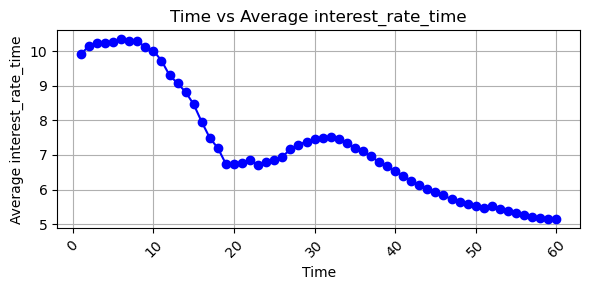

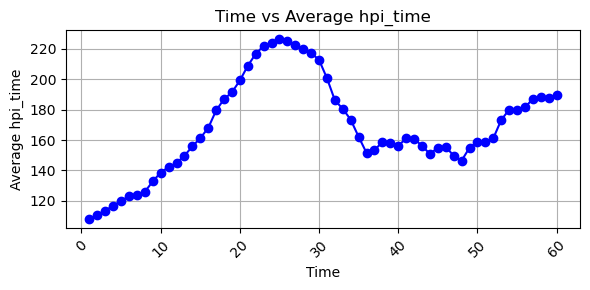

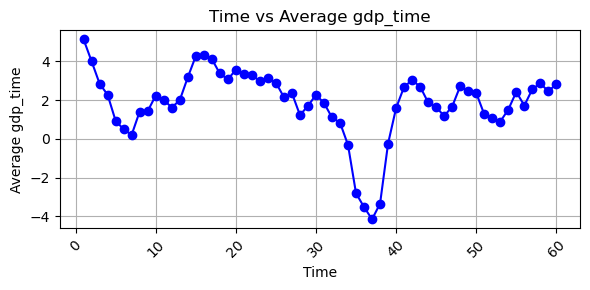

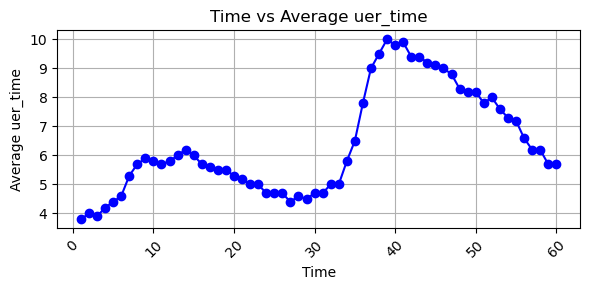

In [317]:
for var in macro_var:
    df_grouped = df.groupby('time', as_index=False).agg({var: 'mean'})
    
    # Plotting time vs average of the macro variable
    plt.figure(figsize=(6, 3))
    plt.plot(df_grouped['time'], df_grouped[var], marker='o', markersize=6, linestyle='-', color='b')
    plt.title(f'Time vs Average {var}')
    plt.xlabel('Time')
    plt.ylabel(f'Average {var}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [318]:
## Creating vintage column using origination time column
# Define the function for the new column 'vintage'
def calculate_vintage(x):
    if x <= 0:
        return 0
    elif x <= 12:
        return 1
    elif x <= 24:
        return 2
    elif x <= 36:
        return 3
    elif x <= 48:
        return 4
    else:
        return 5

# Apply the function to create the new column
df['vintage'] = df['orig_time'].apply(calculate_vintage)

#### Analysis of FICO and LTV
##### During recessionary period, banks grants loans to credit worthy borrowers (higher FICO) and during expansion, the lending standards are relaxed (lower FICO). Also for a given mortgage the laon granted will be tighter during downturn (low LTV) and more relaxed (higher LTV) during expansion.

In [319]:
df_grouped_FICO_orig_time = df.groupby('vintage', as_index=False).agg({'FICO_orig_time': 'mean'})
df_grouped_LTV_orig_time = df.groupby('vintage', as_index=False).agg({'LTV_orig_time': 'mean'})

In [320]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
df_grouped_FICO_orig_time = pd.DataFrame(scaler.fit_transform(df_grouped_FICO_orig_time), columns=df_grouped_FICO_orig_time.columns)
df_grouped_LTV_orig_time = pd.DataFrame(scaler.fit_transform(df_grouped_LTV_orig_time), columns=df_grouped_LTV_orig_time.columns)

df_grouped_FICO_orig_time, df_grouped_LTV_orig_time

(   vintage  FICO_orig_time
 0      0.0        0.000000
 1      0.2        0.217621
 2      0.4        0.560971
 3      0.6        0.484807
 4      0.8        1.000000
 5      1.0        0.481929,
    vintage  LTV_orig_time
 0      0.0       1.000000
 1      0.2       0.662455
 2      0.4       0.587546
 3      0.6       0.664000
 4      0.8       0.000000
 5      1.0       0.341381)

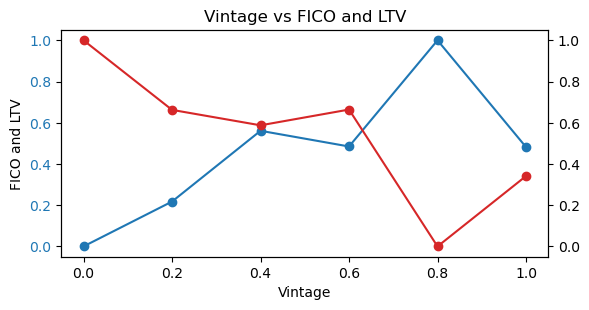

In [321]:
# Plotting gdp_time and uer_time against time
fig, ax1 = plt.subplots(figsize=(6, 3))

ax1.set_xlabel('Vintage')
ax1.set_ylabel('FICO and LTV')
ax1.plot(df_grouped_FICO_orig_time['vintage'], df_grouped_FICO_orig_time['FICO_orig_time'], marker='o', color='tab:blue', label='FICO')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(df_grouped_LTV_orig_time['vintage'], df_grouped_LTV_orig_time['LTV_orig_time'], marker='o', color='tab:red', label='LTV')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Vintage vs FICO and LTV')
plt.xticks(rotation=45)
plt.show()

**---------------------------------------------------------------------------------- End of EDA --------------------------------------------------------------------------------------------**

### Deriving New Variabes

In [322]:
## Age effect - As loan matures, default rates first increases, and then starts to go down. This is captured by Months on books(MOB).
## MOB = snapshot time - origination time

df['MOB'] = df['time'] - df['orig_time']

#Capping to 40 because beyond that data is very less
df['MOB'] = df['MOB'].apply(lambda x: 40 if x > 40 else x)

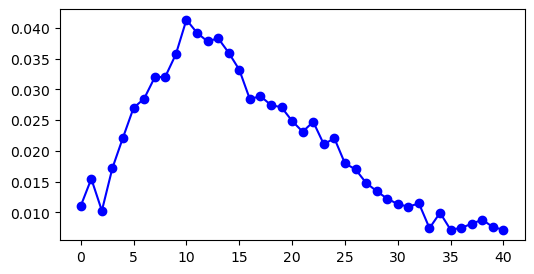

In [323]:
df_grouped = df.groupby('MOB', as_index=False).agg({'default_time': 'mean'})
    
# Plotting MOB vs default rate
plt.figure(figsize=(6, 3))
plt.plot(df_grouped['MOB'], df_grouped['default_time'], marker='o', markersize=6, linestyle='-', color='b')

In [324]:
#To capture the quadratic we will create MOB^2

df['MOB_2'] = df['MOB']**2

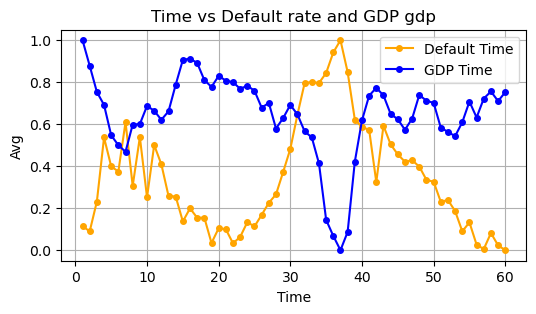

In [325]:
## Period effect - Reflects external economic effect (Recession, Boom) which directly effects to default rates

df_grouped_period = df.groupby('time', as_index=False).agg({'default_time': 'mean'})
df_grouped_gdp = df.groupby('time', as_index=False).agg({'gdp_time': 'mean'})

df_grouped_period['default_time'] = scaler.fit_transform(df_grouped_period[['default_time']])
df_grouped_gdp['gdp_time'] = scaler.fit_transform(df_grouped_gdp[['gdp_time']])

    
# Plotting time vs default rate vs gdp
plt.figure(figsize=(6, 3))
plt.plot(df_grouped_period['time'], df_grouped_period['default_time'], marker='o', markersize=4, linestyle='-', color='orange', label='Default Time')
plt.plot(df_grouped_gdp['time'], df_grouped_gdp['gdp_time'], marker='o', markersize=4, linestyle='-', color='blue', label='GDP Time')
plt.xlabel('Time')
plt.ylabel('Avg')
plt.title('Time vs Default rate and GDP gdp')
plt.legend()
plt.grid(True)
plt.show()

In [326]:
#We can see a negative relationship with some lag which is quite intuitive.

In [327]:
# Create lagged variable (lag of 1)
df_grouped_period['default_time_lag1'] = df_grouped_period['default_time'].shift(1)

# Drop rows with NaN values (resulting from shifting)
df_grouped_period = df_grouped_period.dropna()

# Compute the correlation
correlation = df_grouped_period['default_time_lag1'].corr(df_grouped_gdp['gdp_time'])

print(f"Correlation between 'gdp_time' and lagged 'default_time': {correlation}")

Correlation between 'gdp_time' and lagged 'default_time': -0.7602427366566555


<BarContainer object of 6 artists>

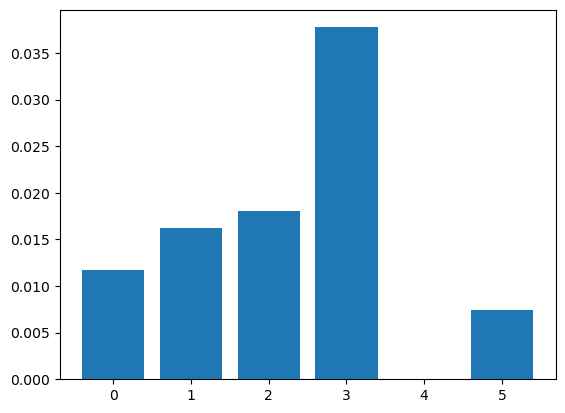

In [328]:
## Cohort effect - Reflects quality of business underwritten based on underwriting standards or macroeconomic variable

df_grouped = df.groupby('vintage', as_index=False).agg({'default_time': 'mean'})

plt.bar(df_grouped['vintage'], df_grouped['default_time'])

##### In this model we will capture age effects by including MOB & MOB^2, vintage effect through dummy variable and period effect through MEVs.

#### Liquidity and Equity Constraint - Double trigger theory

In [329]:
#Liquidity constarint - It is the inability of borrower to make scheduled payments.
#We approximate borrower liquidity by cummulative excessive payments (CEP).
#CEP < 0 => repaying rate of loan by borrower is slow, or he is not making payment on time.
#CEP > 0 => repaying rate of loan by borrower is fast

#Equity contraint - It is the unwillingness of the borrower to make payments.

In [330]:
df['equity_time'] = 1 - (df['LTV_time']/100)

In [331]:
df['interest_rate_time'] = df['interest_rate_time']/(df['interest_rate_time']*100)

In [332]:
df['age_time'] = df['mat_time'] - df['orig_time']

In [333]:
df['annuity'] = (df['interest_rate_time']*df['balance_orig_time'])/(1-(1+df['interest_rate_time'])**(-df['age_time']))

In [334]:
df['n2'] = df['time'] - df['orig_time']

In [335]:
df['FV_balance'] = df['balance_orig_time'] * ((1 + df['interest_rate_time'])**df['n2'])

In [336]:
df['FV_annuity'] = df.apply(lambda row: row['annuity'] * ((1 + row['interest_rate_time'])**row['n2'] - 1) / row['interest_rate_time'], axis=1)

In [337]:
df['balance_scheduled_time'] = df['FV_balance'] - df['FV_annuity']

In [338]:
df['property_orig_time'] = df.apply(lambda row: max(row['balance_orig_time'] / (row['LTV_orig_time'] / 100), 100000), axis=1)

In [339]:
df['cep_time'] = (df['balance_scheduled_time'] - df['balance_time'])/df['property_orig_time']

In [340]:
df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res,vintage,MOB,MOB_2,equity_time,age_time,annuity,n2,FV_balance,FV_annuity,balance_scheduled_time,property_orig_time,cep_time
0,1,25,-7,25,113,NaN,41303.42,24.498336,0.01,5.44,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,32,1024,0.755017,120,645.619268,32,61872.330534,24206.892635,37665.437899,100000.0,-0.036380
1,1,26,-7,25,113,NaN,41061.95,24.483867,0.01,5.44,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,33,1089,0.755161,120,645.619268,33,62491.053839,25094.580829,37396.473010,100000.0,-0.036655
2,1,27,-7,25,113,NaN,40804.42,24.626795,0.01,5.44,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,34,1156,0.753732,120,645.619268,34,63115.964378,25991.145905,37124.818473,100000.0,-0.036796
3,1,28,-7,25,113,NaN,40483.89,24.735883,0.01,5.44,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,35,1225,0.752641,120,645.619268,35,63747.124021,26896.676632,36850.447390,100000.0,-0.036334
4,1,29,-7,25,113,NaN,40367.06,24.925476,0.01,5.44,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,36,1296,0.750745,120,645.619268,36,64384.595262,27811.262666,36573.332596,100000.0,-0.037937


Text(0, 0.5, 'cep_time')

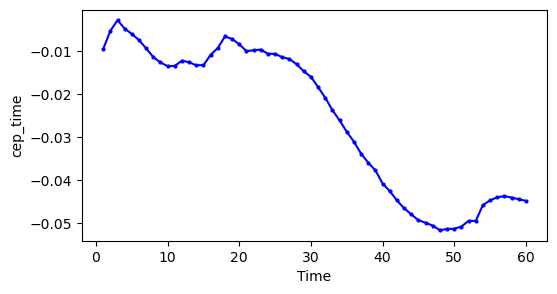

In [341]:
grouped_cep = df.groupby('time', as_index=False).agg({'cep_time': 'mean'})

plt.figure(figsize=(6, 3))
plt.plot(grouped_cep['time'], grouped_cep['cep_time'], marker='o', markersize=2, linestyle='-', color='b')
plt.xlabel('Time')
plt.ylabel('cep_time')

**-----------------------------------------------------------------------------Deriving new variables is done----------------------------------------------------------------------------**

## Model Base

In [342]:
df_snapshot = pd.DataFrame(
    {
        '#obs' : df.groupby('id',as_index = False).agg({'time':'count'})['time'],
        'avg_orig_time' : df.groupby('id',as_index = False).agg({'orig_time':'mean'})['orig_time'],
        'avg_first_time' : df.groupby('id',as_index = False).agg({'first_time':'mean'})['first_time'],
        'max_time' : df.groupby('id',as_index = False).agg({'time':'max'})['time'],
        'sum_status_time' : df.groupby('id',as_index = False).agg({'status_time':'sum'})['status_time']
    }
)

In [343]:
df_snapshot['id'] = df.groupby('id',as_index = False).agg({'time':'count'})['id']

In [344]:
df_snapshot['check'] = df_snapshot.apply(lambda x: 1 if (x['max_time'] - x['avg_first_time'] + 1) == x['#obs'] else 0, axis=1)

In [345]:
df_snapshot.head(20)

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check
0,24,-7.0,25.0,48,1,1,1
1,2,18.0,25.0,26,2,2,1
2,5,-6.0,25.0,29,2,3,1
3,35,-2.0,25.0,60,0,4,0
4,3,18.0,25.0,27,2,5,1
5,31,19.0,25.0,56,1,6,0
6,2,18.0,25.0,26,2,7,1
7,1,18.0,25.0,25,2,8,1
8,13,18.0,25.0,37,1,9,1
9,5,18.0,25.0,29,1,10,1


In [346]:
df_snapshot = df_snapshot[df_snapshot['check'] == 1]

In [347]:
df_snapshot.head()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check
0,24,-7.0,25.0,48,1,1,1
1,2,18.0,25.0,26,2,2,1
2,5,-6.0,25.0,29,2,3,1
4,3,18.0,25.0,27,2,5,1
6,2,18.0,25.0,26,2,7,1


In [348]:
df_snapshot.tail()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check
49972,9,17.0,52.0,60,0,49996,1
49973,9,17.0,52.0,60,0,49997,1
49974,9,17.0,52.0,60,0,49998,1
49975,9,17.0,52.0,60,0,49999,1
49976,9,16.0,52.0,60,0,50000,1


In [349]:
df_snapshot.shape

(48801, 7)

In [350]:
snapshot = [ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 48]
snapshot

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 48]

In [351]:
performance_end = pd.to_numeric(snapshot) + 12
performance_end

array([13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 60], dtype=int64)

In [352]:
# arr_snap = [f"snapshot_{item}" for item in snapshot]
# arr_per = [f"per_end_{item}" for item in performance_end]

arr_snap_per = np.concatenate((snapshot,performance_end))
arr_snap_per

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 48, 13, 17, 21, 25,
       29, 33, 37, 41, 45, 49, 53, 57, 60], dtype=int64)

In [353]:
arr_snap_per = pd.to_numeric(arr_snap_per)
arr_snap_per

array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 48, 13, 17, 21, 25,
       29, 33, 37, 41, 45, 49, 53, 57, 60], dtype=int64)

In [354]:
arr_window = np.arange(1,14,1)
arr_window

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [355]:
# df_snapshot['snapshot'] = ""

In [356]:
# df_snapshot['per_end'] = ""

In [357]:
# Load data with Dask
ddf_snapshot = dd.from_pandas(df_snapshot, npartitions=10)

# Perform operations on Dask dataframe
df_snapshot = dd.concat([ddf_snapshot] * int((len(arr_snap_per)/2))).sort_values(by='id').reset_index(drop=True).compute()

In [358]:
# Function to create the snapshot/performance column
def repeat_snapshot_array(df, snapshot_or_per_array):
    n = int((len(arr_snap_per)/2))
    repeated_snapshot_or_per = np.tile(snapshot_or_per_array, int(np.ceil(len(df) / n)))[:len(df)]
    return repeated_snapshot_or_per

# Add the snapshot column
df_snapshot['snapshot'] = repeat_snapshot_array(df_snapshot, snapshot)

# Add the performance end column
df_snapshot['per_end'] = repeat_snapshot_array(df_snapshot, performance_end)

# Add the window column
df_snapshot['window'] = repeat_snapshot_array(df_snapshot, arr_window)

In [359]:
df_snapshot['status_snapshot'] = np.where(
    df_snapshot['snapshot'] < df_snapshot['avg_first_time'], 
    "", 
    np.where(
        df_snapshot['snapshot'] >= df_snapshot['max_time'], 
        df_snapshot['sum_status_time'], 
        0
    )
)

In [360]:
df_snapshot['status_performance'] = np.where(
    df_snapshot['per_end'] < df_snapshot['avg_first_time'], 
    "", 
    np.where(
        df_snapshot['per_end'] >= df_snapshot['max_time'], 
        df_snapshot['sum_status_time'], 
        0
    )
)

In [361]:
df_snapshot.shape

(634413, 12)

In [362]:
df['id'].nunique()

49977

In [363]:
df_snapshot['id'].nunique()

48801

In [364]:
df_snapshot.head(30)

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check,snapshot,per_end,window,status_snapshot,status_performance
0,24,-7.0,25.0,48,1,1,1,1,13,1,,
1,24,-7.0,25.0,48,1,1,1,5,17,2,,
2,24,-7.0,25.0,48,1,1,1,9,21,3,,
3,24,-7.0,25.0,48,1,1,1,13,25,4,,0
4,24,-7.0,25.0,48,1,1,1,17,29,5,,0
5,24,-7.0,25.0,48,1,1,1,21,33,6,,0
6,24,-7.0,25.0,48,1,1,1,25,37,7,0,0
7,24,-7.0,25.0,48,1,1,1,29,41,8,0,0
8,24,-7.0,25.0,48,1,1,1,33,45,9,0,0
9,24,-7.0,25.0,48,1,1,1,37,49,10,0,1


In [365]:
df_snapshot['status_snapshot'] = pd.to_numeric(df_snapshot['status_snapshot'])
df_snapshot['status_performance'] = pd.to_numeric(df_snapshot['status_performance'])

In [366]:
df_snapshot['keep1'] = np.where(
    df_snapshot['status_snapshot'] != 0, 
    "No", 
    np.where(
        df_snapshot['status_performance'] == 2, 
        "No", 
        "Yes"
    )
)

In [367]:
df_snapshot['keep2'] = np.where(
    df_snapshot['max_time'] < df_snapshot['snapshot'], 
    "No",
    "Yes"
)

In [368]:
df_snapshot.head(10)

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check,snapshot,per_end,window,status_snapshot,status_performance,keep1,keep2
0,24,-7.0,25.0,48,1,1,1,1,13,1,NaN,NaN,No,Yes
1,24,-7.0,25.0,48,1,1,1,5,17,2,NaN,NaN,No,Yes
2,24,-7.0,25.0,48,1,1,1,9,21,3,NaN,NaN,No,Yes
3,24,-7.0,25.0,48,1,1,1,13,25,4,NaN,0.0,No,Yes
4,24,-7.0,25.0,48,1,1,1,17,29,5,NaN,0.0,No,Yes
5,24,-7.0,25.0,48,1,1,1,21,33,6,NaN,0.0,No,Yes
6,24,-7.0,25.0,48,1,1,1,25,37,7,0.0,0.0,Yes,Yes
7,24,-7.0,25.0,48,1,1,1,29,41,8,0.0,0.0,Yes,Yes
8,24,-7.0,25.0,48,1,1,1,33,45,9,0.0,0.0,Yes,Yes
9,24,-7.0,25.0,48,1,1,1,37,49,10,0.0,1.0,Yes,Yes


In [369]:
df_snapshot = df_snapshot[(df_snapshot['keep1'] == 'Yes') & (df_snapshot['keep2'] == 'Yes')]

In [370]:
df_snapshot.shape

(87155, 14)

In [371]:
df_snapshot['MOB'] = df_snapshot['snapshot'] - df_snapshot['avg_orig_time']

In [372]:
conditions = [
    (df_snapshot['avg_orig_time'] <= 0),
    (df_snapshot['avg_orig_time'] <= 12),
    (df_snapshot['avg_orig_time'] <= 24),
    (df_snapshot['avg_orig_time'] <= 36),
    (df_snapshot['avg_orig_time'] <= 48)
]

choices = [0, 1, 2, 3, 4]

df_snapshot['Vintage'] = np.select(conditions, choices, default=5)

In [373]:
df_snapshot['Vintage'] = pd.to_numeric(df_snapshot['Vintage'])

In [374]:
#We will create behavioural scorecard only for seasoned account

df_snapshot['Seasoned'] = np.where(df_snapshot['MOB'] >= 12, "Yes", "No")

In [375]:
df_snapshot.head()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check,snapshot,per_end,window,status_snapshot,status_performance,keep1,keep2,MOB,Vintage,Seasoned
6,24,-7.0,25.0,48,1,1,1,25,37,7,0.0,0.0,Yes,Yes,32.0,0,Yes
7,24,-7.0,25.0,48,1,1,1,29,41,8,0.0,0.0,Yes,Yes,36.0,0,Yes
8,24,-7.0,25.0,48,1,1,1,33,45,9,0.0,0.0,Yes,Yes,40.0,0,Yes
9,24,-7.0,25.0,48,1,1,1,37,49,10,0.0,1.0,Yes,Yes,44.0,0,Yes
10,24,-7.0,25.0,48,1,1,1,41,53,11,0.0,1.0,Yes,Yes,48.0,0,Yes


In [376]:
df_snapshot['Seasoned'].unique()

array(['Yes', 'No'], dtype=object)

In [377]:
df_snapshot = df_snapshot[df_snapshot['Seasoned'] == "Yes"]

In [378]:
df_snapshot.shape

(42440, 17)

In [379]:
df.shape

(621854, 41)

In [380]:
df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res,vintage,MOB,MOB_2,equity_time,age_time,annuity,n2,FV_balance,FV_annuity,balance_scheduled_time,property_orig_time,cep_time
0,1,25,-7,25,113,NaN,41303.42,24.498336,0.01,5.44,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,32,1024,0.755017,120,645.619268,32,61872.330534,24206.892635,37665.437899,100000.0,-0.036380
1,1,26,-7,25,113,NaN,41061.95,24.483867,0.01,5.44,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,33,1089,0.755161,120,645.619268,33,62491.053839,25094.580829,37396.473010,100000.0,-0.036655
2,1,27,-7,25,113,NaN,40804.42,24.626795,0.01,5.44,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,34,1156,0.753732,120,645.619268,34,63115.964378,25991.145905,37124.818473,100000.0,-0.036796
3,1,28,-7,25,113,NaN,40483.89,24.735883,0.01,5.44,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,35,1225,0.752641,120,645.619268,35,63747.124021,26896.676632,36850.447390,100000.0,-0.036334
4,1,29,-7,25,113,NaN,40367.06,24.925476,0.01,5.44,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,36,1296,0.750745,120,645.619268,36,64384.595262,27811.262666,36573.332596,100000.0,-0.037937


In [381]:
df_snapshot.head()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check,snapshot,per_end,window,status_snapshot,status_performance,keep1,keep2,MOB,Vintage,Seasoned
6,24,-7.0,25.0,48,1,1,1,25,37,7,0.0,0.0,Yes,Yes,32.0,0,Yes
7,24,-7.0,25.0,48,1,1,1,29,41,8,0.0,0.0,Yes,Yes,36.0,0,Yes
8,24,-7.0,25.0,48,1,1,1,33,45,9,0.0,0.0,Yes,Yes,40.0,0,Yes
9,24,-7.0,25.0,48,1,1,1,37,49,10,0.0,1.0,Yes,Yes,44.0,0,Yes
10,24,-7.0,25.0,48,1,1,1,41,53,11,0.0,1.0,Yes,Yes,48.0,0,Yes


In [382]:
df['key'] = df['id'].astype(str) + '-' +  df['time'].astype(str)
df.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res,vintage,MOB,MOB_2,equity_time,age_time,annuity,n2,FV_balance,FV_annuity,balance_scheduled_time,property_orig_time,cep_time,key
0,1,25,-7,25,113,NaN,41303.42,24.498336,0.01,5.44,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,32,1024,0.755017,120,645.619268,32,61872.330534,24206.892635,37665.437899,100000.0,-0.036380,1-25
1,1,26,-7,25,113,NaN,41061.95,24.483867,0.01,5.44,225.10,2.151365,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,33,1089,0.755161,120,645.619268,33,62491.053839,25094.580829,37396.473010,100000.0,-0.036655,1-26
2,1,27,-7,25,113,NaN,40804.42,24.626795,0.01,5.44,222.39,2.361722,4.4,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,34,1156,0.753732,120,645.619268,34,63115.964378,25991.145905,37124.818473,100000.0,-0.036796,1-27
3,1,28,-7,25,113,NaN,40483.89,24.735883,0.01,5.44,219.67,1.229172,4.6,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,35,1225,0.752641,120,645.619268,35,63747.124021,26896.676632,36850.447390,100000.0,-0.036334,1-28
4,1,29,-7,25,113,NaN,40367.06,24.925476,0.01,5.44,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,36,1296,0.750745,120,645.619268,36,64384.595262,27811.262666,36573.332596,100000.0,-0.037937,1-29


In [383]:
df_snapshot['id'] = df_snapshot['id'].astype(int)

In [384]:
df_snapshot['key'] = df_snapshot['id'].astype(str) + '-' + df_snapshot['snapshot'].astype(str)
df_snapshot.head()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id,check,snapshot,per_end,window,status_snapshot,status_performance,keep1,keep2,MOB,Vintage,Seasoned,key
6,24,-7.0,25.0,48,1,1,1,25,37,7,0.0,0.0,Yes,Yes,32.0,0,Yes,1-25
7,24,-7.0,25.0,48,1,1,1,29,41,8,0.0,0.0,Yes,Yes,36.0,0,Yes,1-29
8,24,-7.0,25.0,48,1,1,1,33,45,9,0.0,0.0,Yes,Yes,40.0,0,Yes,1-33
9,24,-7.0,25.0,48,1,1,1,37,49,10,0.0,1.0,Yes,Yes,44.0,0,Yes,1-37
10,24,-7.0,25.0,48,1,1,1,41,53,11,0.0,1.0,Yes,Yes,48.0,0,Yes,1-41


In [385]:
df['key'] = df['key'].astype(str)
df_snapshot['key'] = df_snapshot['key'].astype(str)

In [386]:
df_merged = pd.merge(df_snapshot, df, on = 'key', how='left')
df_merged.head()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id_x,check,snapshot,per_end,window,status_snapshot,status_performance,keep1,keep2,MOB_x,Vintage,Seasoned,key,id_y,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res,vintage,MOB_y,MOB_2,equity_time,age_time,annuity,n2,FV_balance,FV_annuity,balance_scheduled_time,property_orig_time,cep_time
0,24,-7.0,25.0,48,1,1,1,25,37,7,0.0,0.0,Yes,Yes,32.0,0,Yes,1-25,1,25,-7,25,113,NaN,41303.42,24.498336,0.01,5.44,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,32,1024,0.755017,120,645.619268,32,61872.330534,24206.892635,37665.437899,100000.0,-0.036380
1,24,-7.0,25.0,48,1,1,1,29,41,8,0.0,0.0,Yes,Yes,36.0,0,Yes,1-29,1,29,-7,25,113,NaN,40367.06,24.925476,0.01,5.44,217.37,1.692969,4.5,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,36,1296,0.750745,120,645.619268,36,64384.595262,27811.262666,36573.332596,100000.0,-0.037937
2,24,-7.0,25.0,48,1,1,1,33,45,9,0.0,0.0,Yes,Yes,40.0,0,Yes,1-33,1,33,-7,25,113,NaN,34410.03,25.584425,0.01,5.44,180.52,0.836859,5.0,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,40,1600,0.744156,120,645.619268,40,66998.868011,31561.984574,35436.883438,100000.0,0.010269
3,24,-7.0,25.0,48,1,1,1,37,49,10,0.0,1.0,Yes,Yes,44.0,0,Yes,1-37,1,37,-7,25,113,NaN,32388.30,28.347862,0.01,5.44,153.35,-4.146711,9.0,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,40,1600,0.716521,120,645.619268,44,69719.290718,35465.000832,34254.289886,100000.0,0.018660
4,24,-7.0,25.0,48,1,1,1,41,53,11,0.0,1.0,Yes,Yes,48.0,0,Yes,1-41,1,41,-7,25,113,NaN,32024.75,26.687875,0.01,5.44,161.06,2.682497,9.9,0,0,1,0,45000.0,715,69.4,9.2,CA,87.03,0,0,0,0,NaN,NaN,0,40,1600,0.733121,120,645.619268,48,72550.173496,39526.495201,33023.678295,100000.0,0.009989


In [387]:
df_merged.tail()

,#obs,avg_orig_time,avg_first_time,max_time,sum_status_time,id_x,check,snapshot,per_end,window,status_snapshot,status_performance,keep1,keep2,MOB_x,Vintage,Seasoned,key,id_y,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,status_check,lgd_time,recovery_res,vintage,MOB_y,MOB_2,equity_time,age_time,annuity,n2,FV_balance,FV_annuity,balance_scheduled_time,property_orig_time,cep_time
42435,34,25.0,27.0,60,0,49181,1,45,57,12,0.0,0.0,Yes,Yes,20.0,3,Yes,49181-45,49181,45,25,27,145,NaN,459516.57,117.286995,0.01,5.15,154.87,1.639155,9.1,0,0,0,0,457400.0,680,79.9,0.00,NY,226.29,0,0,0,0,NaN,NaN,3,20,400,-0.172870,120,6562.361180,20,558114.924272,144496.657036,413618.267236,572465.581977,-0.080177
42436,34,25.0,27.0,60,0,49181,1,48,60,13,0.0,0.0,Yes,Yes,23.0,3,Yes,49181-48,49181,48,25,27,207,NaN,478732.17,129.216870,0.01,5.15,146.45,2.715903,8.3,0,0,0,0,457400.0,680,79.9,0.00,NY,226.29,0,0,0,0,NaN,NaN,3,23,529,-0.292169,182,5468.002359,23,575026.364593,140616.799101,434409.565492,572465.581977,-0.077424
42437,33,26.0,28.0,60,0,49192,1,41,53,11,0.0,0.0,Yes,Yes,15.0,3,Yes,49192-41,49192,41,26,28,146,NaN,189480.14,80.741448,0.01,4.64,161.06,2.682497,9.9,0,0,1,1,184000.0,516,56.1,7.25,PA,225.10,0,0,0,0,NaN,NaN,3,15,225,0.192586,120,2639.865451,15,213618.287788,42493.638390,171124.649398,327985.739750,-0.055964
42438,33,26.0,28.0,60,0,49192,1,45,57,12,0.0,0.0,Yes,Yes,19.0,3,Yes,49192-45,49192,45,26,28,146,NaN,186641.11,82.710480,0.01,4.64,154.87,1.639155,9.1,0,0,1,1,184000.0,516,56.1,7.25,PA,225.10,0,0,0,0,NaN,NaN,3,19,361,0.172895,120,2639.865451,19,222292.046882,54937.962824,167354.084058,327985.739750,-0.058804
42439,33,26.0,28.0,60,0,49192,1,48,60,13,0.0,0.0,Yes,Yes,22.0,3,Yes,49192-48,49192,48,26,28,146,NaN,185129.25,86.757334,0.01,4.64,146.45,2.715903,8.3,0,0,1,1,184000.0,516,56.1,7.25,PA,225.10,0,0,0,0,NaN,NaN,3,22,484,0.132427,120,2639.865451,22,229027.718194,64601.694337,164426.023857,327985.739750,-0.063122


In [388]:
df_merged.shape

(42440, 59)

In [389]:
df_merged.columns

Index(['#obs', 'avg_orig_time', 'avg_first_time', 'max_time',
       'sum_status_time', 'id_x', 'check', 'snapshot', 'per_end', 'window',
       'status_snapshot', 'status_performance', 'keep1', 'keep2', 'MOB_x',
       'Vintage', 'Seasoned', 'key', 'id_y', 'time', 'orig_time', 'first_time',
       'mat_time', 'res_time', 'balance_time', 'LTV_time',
       'interest_rate_time', 'rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'state_orig_time',
       'hpi_orig_time', 'default_time', 'payoff_time', 'status_time',
       'status_check', 'lgd_time', 'recovery_res', 'vintage', 'MOB_y', 'MOB_2',
       'equity_time', 'age_time', 'annuity', 'n2', 'FV_balance', 'FV_annuity',
       'balance_scheduled_time', 'property_orig_time', 'cep_time'],
      dtype='object')

In [409]:
df_merged_pd = df_merged.drop(['check', 'keep1', 'keep2',
       'Seasoned', 'key', 'id_y', 'time', 'orig_time', 'first_time',
       'mat_time', 'res_time', 'balance_time', 'rate_time', 
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 
       'interest_rate_time', 'state_orig_time',
       'default_time', 'payoff_time', 'status_time',
       'status_check', 'lgd_time', 'recovery_res', 'vintage', 'MOB_y',
       'age_time', 'annuity', 'n2', 'FV_balance', 'FV_annuity',
       'balance_scheduled_time', 'property_orig_time','sum_status_time'], axis = 1)

In [410]:
#As per BASEL we will take 12 months as obs window

df_merged_pd['keep3'] = np.where(df_merged_pd['MOB_x'] < 12, 0, 1) 

In [411]:
df_merged_pd = df_merged_pd[df_merged_pd['keep3'] == 1]

In [412]:
df_merged_pd.shape

(42440, 24)

In [414]:
df_merged_pd.head()

,#obs,avg_orig_time,avg_first_time,max_time,id_x,snapshot,per_end,window,status_snapshot,status_performance,MOB_x,Vintage,LTV_time,hpi_time,gdp_time,uer_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,MOB_2,equity_time,cep_time,keep3
0,24,-7.0,25.0,48,1,25,37,7,0.0,0.0,32.0,0,24.498336,226.29,2.899137,4.7,715,69.4,9.2,87.03,1024,0.755017,-0.036380,1
1,24,-7.0,25.0,48,1,29,41,8,0.0,0.0,36.0,0,24.925476,217.37,1.692969,4.5,715,69.4,9.2,87.03,1296,0.750745,-0.037937,1
2,24,-7.0,25.0,48,1,33,45,9,0.0,0.0,40.0,0,25.584425,180.52,0.836859,5.0,715,69.4,9.2,87.03,1600,0.744156,0.010269,1
3,24,-7.0,25.0,48,1,37,49,10,0.0,1.0,44.0,0,28.347862,153.35,-4.146711,9.0,715,69.4,9.2,87.03,1600,0.716521,0.018660,1
4,24,-7.0,25.0,48,1,41,53,11,0.0,1.0,48.0,0,26.687875,161.06,2.682497,9.9,715,69.4,9.2,87.03,1600,0.733121,0.009989,1


In [415]:
df_merged_pd = df_merged_pd.rename(
    columns=
    {
        'id_x' : 'id',
        'MOB_x' : 'MOB'
    }
)

In [416]:
df_merged_pd.head()

,#obs,avg_orig_time,avg_first_time,max_time,id,snapshot,per_end,window,status_snapshot,status_performance,MOB,Vintage,LTV_time,hpi_time,gdp_time,uer_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,MOB_2,equity_time,cep_time,keep3
0,24,-7.0,25.0,48,1,25,37,7,0.0,0.0,32.0,0,24.498336,226.29,2.899137,4.7,715,69.4,9.2,87.03,1024,0.755017,-0.036380,1
1,24,-7.0,25.0,48,1,29,41,8,0.0,0.0,36.0,0,24.925476,217.37,1.692969,4.5,715,69.4,9.2,87.03,1296,0.750745,-0.037937,1
2,24,-7.0,25.0,48,1,33,45,9,0.0,0.0,40.0,0,25.584425,180.52,0.836859,5.0,715,69.4,9.2,87.03,1600,0.744156,0.010269,1
3,24,-7.0,25.0,48,1,37,49,10,0.0,1.0,44.0,0,28.347862,153.35,-4.146711,9.0,715,69.4,9.2,87.03,1600,0.716521,0.018660,1
4,24,-7.0,25.0,48,1,41,53,11,0.0,1.0,48.0,0,26.687875,161.06,2.682497,9.9,715,69.4,9.2,87.03,1600,0.733121,0.009989,1


In [417]:
df_merged_pd['id_index'] = df_merged_pd['id'].astype(str) + '-' + df_merged_pd['snapshot'].astype(str)

In [418]:
df_merged_pd.drop(columns=['keep3'], inplace=True)

In [419]:
df_merged_pd.head()

,#obs,avg_orig_time,avg_first_time,max_time,id,snapshot,per_end,window,status_snapshot,status_performance,MOB,Vintage,LTV_time,hpi_time,gdp_time,uer_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,MOB_2,equity_time,cep_time,id_index
0,24,-7.0,25.0,48,1,25,37,7,0.0,0.0,32.0,0,24.498336,226.29,2.899137,4.7,715,69.4,9.2,87.03,1024,0.755017,-0.036380,1-25
1,24,-7.0,25.0,48,1,29,41,8,0.0,0.0,36.0,0,24.925476,217.37,1.692969,4.5,715,69.4,9.2,87.03,1296,0.750745,-0.037937,1-29
2,24,-7.0,25.0,48,1,33,45,9,0.0,0.0,40.0,0,25.584425,180.52,0.836859,5.0,715,69.4,9.2,87.03,1600,0.744156,0.010269,1-33
3,24,-7.0,25.0,48,1,37,49,10,0.0,1.0,44.0,0,28.347862,153.35,-4.146711,9.0,715,69.4,9.2,87.03,1600,0.716521,0.018660,1-37
4,24,-7.0,25.0,48,1,41,53,11,0.0,1.0,48.0,0,26.687875,161.06,2.682497,9.9,715,69.4,9.2,87.03,1600,0.733121,0.009989,1-41


In [420]:
df_merged_pd.shape

(42440, 24)

In [421]:
#Partioning data for out-of-time-sample and in-time-sample

df_merged_pd['partioning'] = np.where(df_merged_pd['window'] < 12, "in-time sample","out of time sample")

In [422]:
df_in_time_pd = df_merged_pd[df_merged_pd['partioning'] == 'in-time sample']

In [423]:
df_out_of_time_pd = df_merged_pd[df_merged_pd['partioning'] == 'out of time sample']

In [424]:
df_in_time_pd.shape, df_out_of_time_pd.shape

((26873, 25), (15567, 25))

In [425]:
df_out_of_time_pd.to_csv('out_of_time_pd.csv',index=False)

In [426]:
df_in_time_pd.to_csv('in_time_pd.csv',index=False)

**------------------------------------------------------------End of model design and data is ready for model building----------------------------------------------------------**